In [1]:
# convert in python script by: jupyter nbconvert --to script Visu_discrete.ipynb
# run python script by: python3 Visu_output.py --interactive=0 --printvar=-1-2- 
# or python3 Visu_output.py --interactive=0 --printvar=all (to print all variables)

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

width_in_inches = 12
height_in_inches = 9
dots_per_inch = 100
#fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import os.path
from os import path

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

os.chdir('../output')

# ex no 5
#def f(x,y):
#    return x*x*x*x*x*x + y*y*y*y*y*y + x*y - 3.0, x*x*x*x*x*x - y*y*y*y*y*y - x*y + 1.0;

# ex no 8
#def f(x,y):
#    return 2.0*x*x + y*y - 2.0*x*y - 1.0, x*x - y*y + 3.0*x*y - 3.0

# ex no 7
def f(x,y):
    return 2.0*x*x + 2.0*y*y - 2.0*x*y - 2.0, x*x - y*y + 4.0*x*y - 4.0

#ex no 3
#def f(x,y):
#    return 81.0*x*x + y*y + 18.0*x*y - 100.0, x*x + 81.0*y*y + 18.0*x*y - 100.0

def print_discrete_xy(varx,vary):
    fxy_inner = varx + vary + 'joint_inner.out'
    fxy_skewed_inner = varx + vary + 'skewed_inner.out'
    fxy_skewed_outer = varx + vary + 'skewed_outer.out'
    fx_outer2 = varx + 'outer_mean_value.out'
    fy_outer2 = vary + 'outer_mean_value.out'
    fx_inner = varx + 'inner.out'
    fy_inner = vary + 'inner.out'
#    if (path.isfile(fx_outer2) and path.isfile(fy_outer2)):
    fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
        
    if (path.isfile(fx_outer2) and path.isfile(fy_outer2)):
        with open(fx_outer2, 'r') as x_outer2, open(fy_outer2, 'r') as y_outer2:
            linesx_outer2 = x_outer2.readlines()
            xmin_outer2 = [float(line.split()[0]) for line in linesx_outer2]
            xmax_outer2 = [float(line.split()[1]) for line in linesx_outer2]
            linesy_outer2 = y_outer2.readlines()
            ymin_outer2 = [float(line.split()[0]) for line in linesy_outer2]
            ymax_outer2 = [float(line.split()[1]) for line in linesy_outer2]

            for xo1,xo2,yo1,yo2 in zip(xmin_outer2,xmax_outer2,ymin_outer2,ymax_outer2):
                car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, color='green', ec='black', linewidth=2, alpha=0.05)
                ax.add_patch(car_fig)
            car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, label='over-approximation', color='green', ec='black', linewidth=2, alpha=0.05)
            ax.add_patch(car_fig)
          
    if (path.isfile(fxy_skewed_outer)):
        with open(fxy_skewed_outer, 'r') as xy_skewed_outer:
            linesxy_skewed_outer = xy_skewed_outer.readlines()
            x1_outer = [float(line.split()[0]) for line in linesxy_skewed_outer]
            y1_outer = [float(line.split()[1]) for line in linesxy_skewed_outer]
            x2_outer = [float(line.split()[2]) for line in linesxy_skewed_outer]
            y2_outer = [float(line.split()[3]) for line in linesxy_skewed_outer]
            x3_outer = [float(line.split()[4]) for line in linesxy_skewed_outer]
            y3_outer = [float(line.split()[5]) for line in linesxy_skewed_outer]
            x4_outer = [float(line.split()[6]) for line in linesxy_skewed_outer]
            y4_outer = [float(line.split()[7]) for line in linesxy_skewed_outer]
                
            for xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(x1_outer,y1_outer,x2_outer,y2_outer,x3_outer,y3_outer,x4_outer,y4_outer):
                car_fig = Polygon([(xi1,yi1), (xi2,yi2), (xi3,yi3), (xi4,yi4)], color='green', ec='black', linewidth=3,alpha=0.3)
                ax.add_patch(car_fig)
        
    if (path.isfile(fxy_inner)):
        with open(fxy_inner, 'r') as xy_inner:
            linesxy_inner = xy_inner.readlines()     
            xmin_inner = [float(line.split()[0]) for line in linesxy_inner]
            xmax_inner = [float(line.split()[1]) for line in linesxy_inner]
            ymin_inner = [float(line.split()[2]) for line in linesxy_inner]
            ymax_inner = [float(line.split()[3]) for line in linesxy_inner]

            for xi1,xi2,yi1,yi2 in zip(xmin_inner,xmax_inner,ymin_inner,ymax_inner):
                car_fig2 = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, color='orange', ec='black', linestyle='--', linewidth=3 ,alpha=0.5)
                ax.add_patch(car_fig2)
            car_fig2 = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, label='under-approximation', color='orange', ec='black', linestyle='--', linewidth=3,alpha=0.3)
            ax.add_patch(car_fig2)
        
    if (path.isfile(fx_inner) and path.isfile(fy_inner)):
        with open(fx_inner, 'r') as x_inner, open(fy_inner, 'r') as y_inner: 
            linesx_inner = x_inner.readlines()
            xmin_inner = [float(line.split()[0]) for line in linesx_inner]
            xmax_inner = [float(line.split()[1]) for line in linesx_inner]
            linesy_inner = y_inner.readlines()
            ymin_inner = [float(line.split()[0]) for line in linesy_inner]
            ymax_inner = [float(line.split()[1]) for line in linesy_inner]
            ycenter = [(ymax+ymin)/2.0 for ymin,ymax in zip(ymin_inner,ymax_inner)]
            xcenter = [(xmax+xmin)/2.0 for xmin,xmax in zip(xmin_inner,xmax_inner)]
            plt.plot([xmin_inner, xmax_inner], [ycenter,ycenter], color='red', linestyle='--', linewidth=3)
            plt.plot([xcenter,xcenter], [ymin_inner, ymax_inner], color='red', linestyle='--', linewidth=3, label='projected under-approx')

    if (path.isfile(fxy_skewed_inner)):
        with open(fxy_skewed_inner, 'r') as xy_skewed_inner:
            linesxy_skewed_inner = xy_skewed_inner.readlines()
            x1_inner = [float(line.split()[0]) for line in linesxy_skewed_inner]
            y1_inner = [float(line.split()[1]) for line in linesxy_skewed_inner]
            x2_inner = [float(line.split()[2]) for line in linesxy_skewed_inner]
            y2_inner = [float(line.split()[3]) for line in linesxy_skewed_inner]
            x3_inner = [float(line.split()[4]) for line in linesxy_skewed_inner]
            y3_inner = [float(line.split()[5]) for line in linesxy_skewed_inner]
            x4_inner = [float(line.split()[6]) for line in linesxy_skewed_inner]
            y4_inner = [float(line.split()[7]) for line in linesxy_skewed_inner]
                
            for xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(x1_inner,y1_inner,x2_inner,y2_inner,x3_inner,y3_inner,x4_inner,y4_inner):
                car_fig = Polygon([(xi1,yi1), (xi2,yi2), (xi3,yi3), (xi4,yi4)], color='orange', ec='black', linestyle='--', linewidth=3,alpha=0.5)
                ax.add_patch(car_fig)
                    
 #       Z = [f(x,y) for x in np.arange(1.0,1.1,0.001) for y in np.arange(0.9,1.0,0.001)]
 #       x, y = zip(*Z)
 #       plt.scatter(x,y)
        
    if (path.isfile('xi.out')):
        with open('xi.out','r') as xi:
            lines_xi = xi.readlines()
            z1 = [float(line.split()[0]) for line in lines_xi]
            z2 = [float(line.split()[1]) for line in lines_xi]
            plt.scatter(z1,z2,c='purple',alpha=1.,s=1.,label='estimated reachable states')
    #        Z = [f(x,y) for x in np.arange(0.99,1.01,0.001) for y in np.arange(0.99,1.01,0.001)]

            
       
        
        #for i in range(N):
    #polygon = Polygon(np.random.rand(N, 2), True)
    #patches.append(polygon)

#colors = 100*np.random.rand(len(patches))
#p = PatchCollection(patches, alpha=0.4)
#p.set_array(np.array(colors))
#ax.add_collection(p)
#fig.colorbar(p, ax=ax)
        
        
    ax.autoscale()
    ax.set_xlabel(varx,fontsize="x-large")
    ax.set_ylabel(vary,fontsize="x-large")
#        plt.legend(fontsize="x-large",loc='center')
    plt.legend(fontsize="x-large",loc='lower right')
    f_output= varx + vary
    plt.savefig(f_output)
        
        
        
       # car_fig = Rectangle([-20.2,-20.2],41.2,41.2)
       # ax.add_patch(car_fig)
        
    plt.show() 
    plt.close()



No handles with labels found to put in legend.


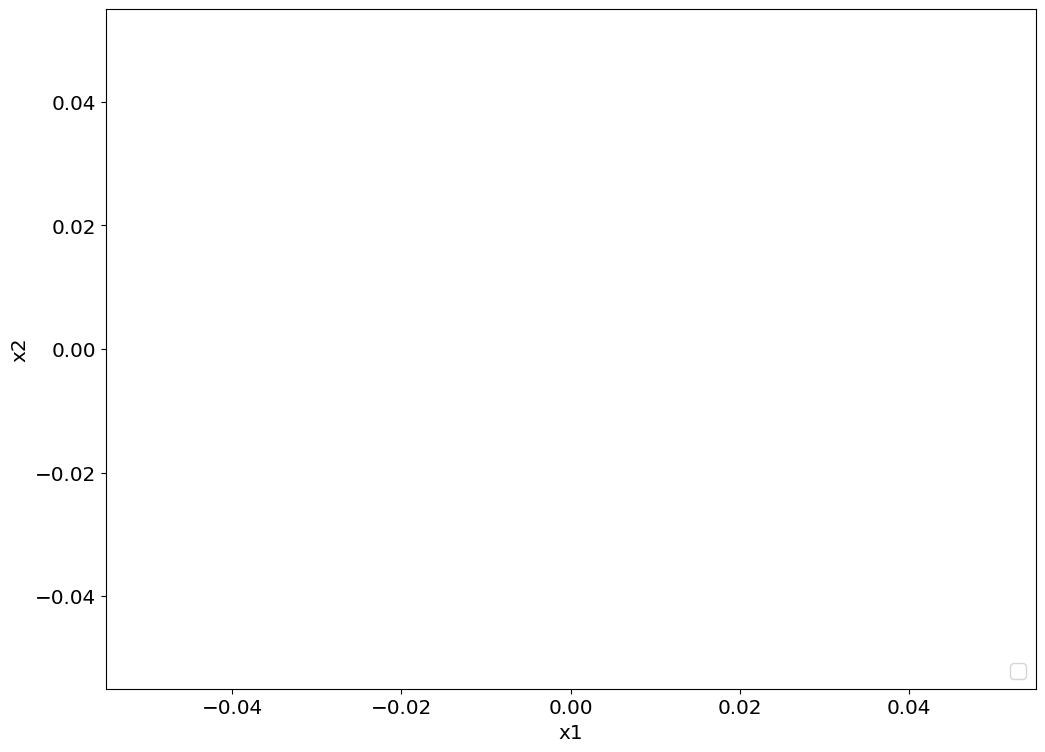

In [2]:
print_discrete_xy("x1","x2")

<ipython-input-3-2eff14d7ef44>:30: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(3,0.7), xytext=(2,0.7), arrowprops=dict(arrowstyle='<->'))
<ipython-input-3-2eff14d7ef44>:43: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(2.1,1.25), xytext=(2.1,6.25), arrowprops=dict(arrowstyle='<->',color='g'))
<ipython-input-3-2eff14d7ef44>:48: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(2.2,2.25), xytext=(2.2,5.25), arrowprops=dict(arrowstyle='<->',color='red'))
<ipython-input-3-2eff14d7ef44>:54: MatplotlibDeprecationWarning: The 's' parameter o

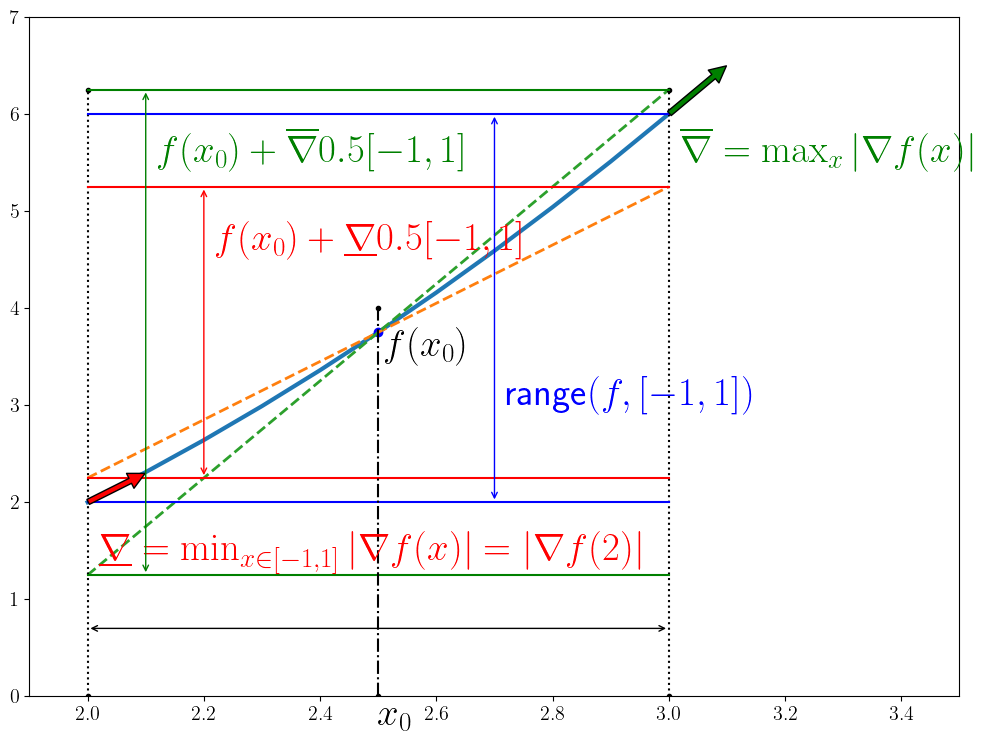

In [3]:
prop1 = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",facecolor='red',
            shrink=0.05)
prop2 = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",facecolor='green',
            shrinkA=0,shrinkB=0)

from matplotlib import rc
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

rc('text', usetex=True)
def f(x):
    return x*x-x

x = np.arange(2., 3.1, 0.1)
plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
plt.axis([1.9, 3.5, 0., 7])
plt.plot(x,f(x),lw=3)

plt.annotate("", xy=(2+0.1,f(2)+0.3), xytext=(2,f(2)), arrowprops=dict(facecolor='red', shrink=0.01))
plt.text(2.02, 1.4, r'$\underline{\nabla}=\min_{x \in [-1,1]} | \nabla f(x) | = |\nabla f(2)|$', {'color': 'red', 'fontsize': 28})
plt.annotate("", xy=(3+0.1,f(3)+0.5), xytext=(3,f(3)), arrowprops=dict(facecolor='green', shrink=0.01))
plt.text(3.02, 5.5, r'$\overline{\nabla}=\max_x | \nabla f(x) | $', {'color': 'g', 'fontsize': 28})

plt.annotate(s='', xy=(3,0.7), xytext=(2,0.7), arrowprops=dict(arrowstyle='<->'))
#plt.text(2.52, 0.9, r'$r(x)$', {'color': 'k', 'fontsize': 18})

plt.plot([2.5], [f(2.5)], 'bo')
plt.plot([2, 2.5, 3],[f(2.5)-3*0.5, f(2.5), f(2.5)+3*0.5],ls='--',lw=2)

plt.plot([2, 2.5, 3],[f(2.5)-5*0.5, f(2.5), f(2.5)+5*0.5],ls='--',lw=2)

plt.plot([3, 3], [0, 6.25], 'k.', linestyle=':')
plt.plot([2, 2], [0, 6.25], 'k.', linestyle=':')

plt.plot([2, 3], [1.25, 1.25], 'g', linestyle='-')
plt.plot([2, 3], [6.25, 6.25], 'g', linestyle='-')
plt.annotate(s='', xy=(2.1,1.25), xytext=(2.1,6.25), arrowprops=dict(arrowstyle='<->',color='g'))
plt.text(2.12, 5.5, r'$f(x_0) +  \overline{\nabla} 0.5 [-1,1]$', {'color': 'g', 'fontsize': 28})

plt.plot([2, 3], [2.25, 2.25], 'red', linestyle='-')
plt.plot([2, 3], [5.25, 5.25], 'red', linestyle='-')
plt.annotate(s='', xy=(2.2,2.25), xytext=(2.2,5.25), arrowprops=dict(arrowstyle='<->',color='red'))
plt.text(2.22, 4.6, r'$f(x_0) + \underline{\nabla} 0.5 [-1,1]$', {'color': 'red', 'fontsize': 28})


plt.plot([2, 3], [2., 2.], 'blue', linestyle='-')
plt.plot([2, 3], [6., 6.], 'blue', linestyle='-')
plt.annotate(s='', xy=(2.7,2.), xytext=(2.7,6.), arrowprops=dict(arrowstyle='<->',color='blue'))
plt.text(2.72, 3., r'$\mbox{range}(f,[-1,1])$', {'color': 'blue', 'fontsize': 28})

plt.plot([2.5, 2.5], [0, 4], 'k.', linestyle='-.')

plt.text(2.5, -0.3, r'$x_0$', {'color': 'k', 'fontsize': 28})
plt.text(2.51, 3.5, r'$f(x_0)$', {'color': 'k', 'fontsize': 28})

#plt.arrow(3,f(3),0.1,0.5,color='green',lw=2,head_width=0.05,head_length=0.1)

#ax = plt.axes()
#ax.autoscale()

plt.savefig('explain-mean-value')
plt.show()
plt.close()